In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
classfied = pd.read_csv("resources/ClassifiedData.xlsx", index_col = 0)

In [4]:
classfied.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### because the KNN clafssifier predicts the class of a given test observation by identifying the observations  next to it. THe scale matters. Large scale variables will have a larger effect. So we need to get al lthe variables on the same scale

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

## Scale all feature objects

In [7]:
scaler.fit(classfied.drop("TARGET CLASS", axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

### LEts get the scaled features. Transform centers and scales the data

In [8]:
scaled_features = scaler.transform(classfied.drop("TARGET CLASS", axis = 1))

In [12]:
features_DF = pd.DataFrame(scaled_features, columns=classfied.columns[:-1])

In [14]:
features_DF.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X =features_DF
y = classfied["TARGET CLASS"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
klearn = KNeighborsClassifier(n_neighbors= 1)

In [25]:
klearn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
predictions = klearn.predict(X_test)

### Metrics

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [30]:
print(confusion_matrix(y_test, predictions))

[[151   8]
 [ 15 126]]


### LEts see if we can use the elbow method to get a better K value and improve our predictions. Iterate many models with different K valies and plot error rate to see who has the better K value 

In [31]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi = knn.predict(X_test)
    ## Average of were the predictions were not equal to the test values
    error_rate.append(np.mean(predi != y_test))

### We will plot this on a map to see whick k is better for a more effective model. Looks like there is a low error rate around 34 so we will use that as our new value of K

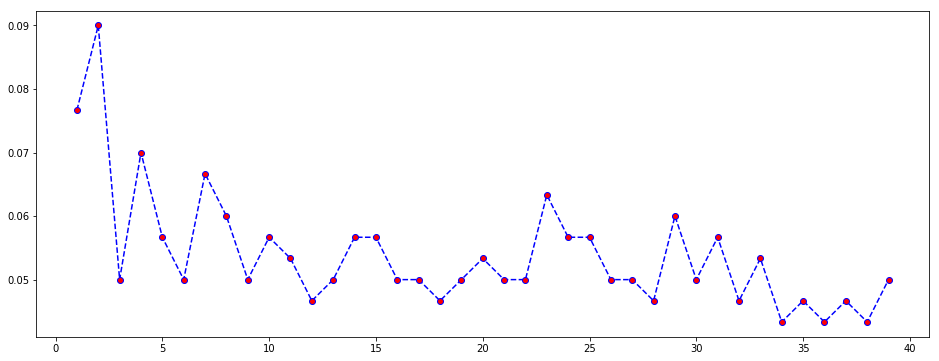

In [40]:
plt.figure(figsize=(16,6))
plt.plot(range(1,40),error_rate, c ="b", ls = "--", marker = "o", markerfacecolor= "r")

In [41]:
leanK =KNeighborsClassifier(n_neighbors=34)

In [42]:
leanK.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=34, p=2,
           weights='uniform')

In [43]:
pred = leanK.predict(X_test)

In [44]:
print(confusion_matrix(y_test, pred))

[[153   6]
 [  7 134]]


In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

